In [1]:
%matplotlib inline

Matplotlib is building the font cache; this may take a moment.



Optimization with constraints
================================

An example showing how to do optimization with general constraints using
SLSQP and cobyla.



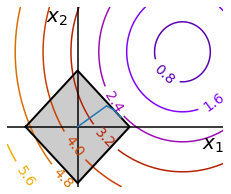

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import optimize

x, y = np.mgrid[-2.03:4.2:.04, -1.6:3.2:.04]
x = x.T
y = y.T

plt.figure(1, figsize=(3, 2.5))
plt.clf()
plt.axes([0, 0, 1, 1])

contours = plt.contour(np.sqrt((x - 3)**2 + (y - 2)**2),
                    extent=[-2.03, 4.2, -1.6, 3.2],
                    cmap=plt.cm.gnuplot)
plt.clabel(contours,
        inline=1,
        fmt='%1.1f',
        fontsize=14)
plt.plot([-1.5,    0,  1.5,    0, -1.5],
        [   0,  1.5,    0, -1.5,    0], 'k', linewidth=2)
plt.fill_between([ -1.5,    0,  1.5],
                [    0, -1.5,    0],
                [    0,  1.5,    0],
                color='.8')
plt.axvline(0, color='k')
plt.axhline(0, color='k')

plt.text(-.9, 2.8, '$x_2$', size=20)
plt.text(3.6, -.6, '$x_1$', size=20)
plt.axis('tight')
plt.axis('off')

# And now plot the optimization path
accumulator = list()

def f(x):
    # Store the list of function calls
    accumulator.append(x)
    return np.sqrt((x[0] - 3)**2 + (x[1] - 2)**2)


def constraint(x):
    return np.atleast_1d(1.5 - np.sum(np.abs(x)))

optimize.minimize(f, np.array([0, 0]), method="SLSQP",
                     constraints={"fun": constraint, "type": "ineq"})

accumulated = np.array(accumulator)
plt.plot(accumulated[:, 0], accumulated[:, 1])

plt.show()